# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Noise reduction



# Noisiness and audio clipping
<hr style = "border:2px solid black" ></hr>


- One of the primary struggles of building audio classifiers is obtaining a quality dataset on which to train. We addressed two quality issues: 
    - Noisiness 
    - Variable time durations
    


# Import modules
<hr style = "border:2px solid black" ></hr>

In [38]:
import librosa
import noisereduce as nr 
from IPython.display import Audio
# to use the old API
from noisereduce.noisereducev1 import reduce_noise
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")

# Import dataset
<hr style = "border:2px solid black" ></hr>


- To filter the noise, we first loaded the WAV files using the LibrROSA library which converts the WAV files to numpy arrays consisting of amplitudes sampled at some arbitrary sampling rate.
- The clip demonstrated below is that of some crows cawing.
- In the **background**, a strong consistent gust of wind can be heard clearly throughout the entire waveform.



In [20]:
fn = "../../../DATASETS/environmental_sound_classification_50/2-108767-B-9.wav"
audio_data, sampling_rate = librosa.load(fn)

In [33]:
audio_data

array([-0.00437039, -0.00632159, -0.00825907, ...,  0.00461764,
        0.0042599 ,  0.00345931], dtype=float32)

In [34]:
sampling_rate

22050

In [21]:
# Play the audio in the jupyter notebook
Audio(fn)

# Noise reduction
<hr style = "border:2px solid black" ></hr>


- We'll use a noise reduction algorithm called **spectral noise gating**.

- It finds the spectrum of **pure tones** that make up the background noise in the quiet sound segment that you selected — that’s called the “frequency spectrum” of the sound.

- A pure tone is a sound or a signal with a sinusoidal waveform; that is, a sine wave of any frequency, phase-shift, and amplitude.
    
- That forms a fingerprint of the static background noise in your sound file. When you reduce noise from the sound as a whole, the algorithm finds the frequency spectrum of each short segment of sound. 
    
- Any pure tones that aren’t sufficiently louder than their average levels in the fingerprint are reduced in volume.
    
- We use a Python packaged called `noisereduce` which implements a similar noise reduction algorithm.



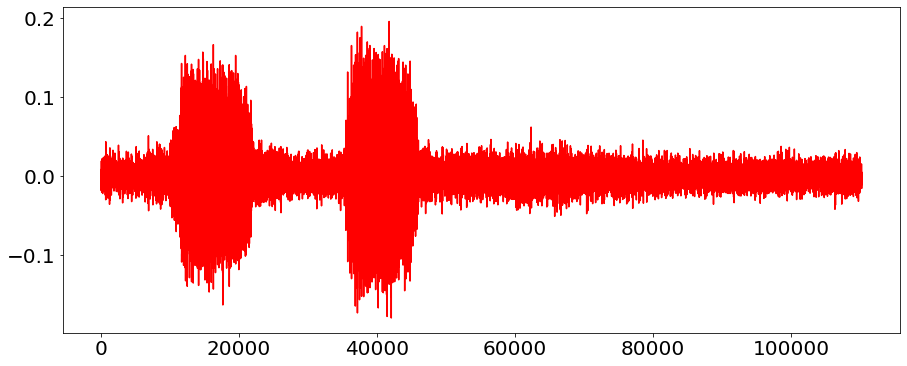

In [41]:
rcParams['figure.figsize'] = 15, 6
rcParams['font.size'] = 20
plt.plot(range(len(audio_data)), audio_data, "r-")


- The noisy_partwas selected carefully using inspection; this is a tedious process to perform on a large dataset whose WAV samples have been recorded using different equipment and methods in varying environments and settings.
    


  0%|          | 0/7 [00:00<?, ?it/s]

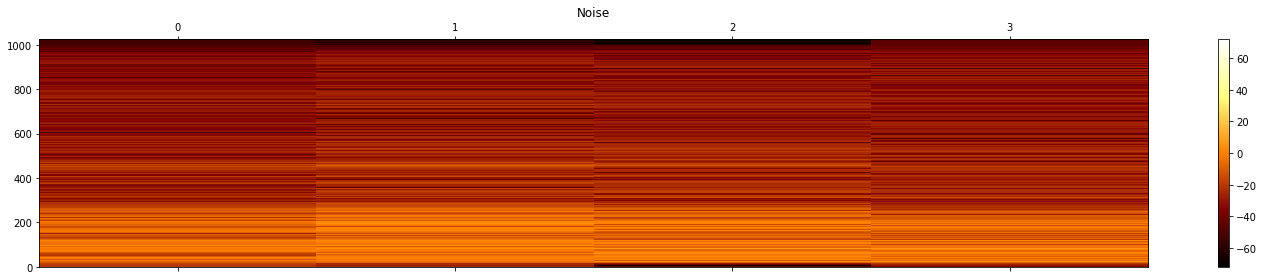

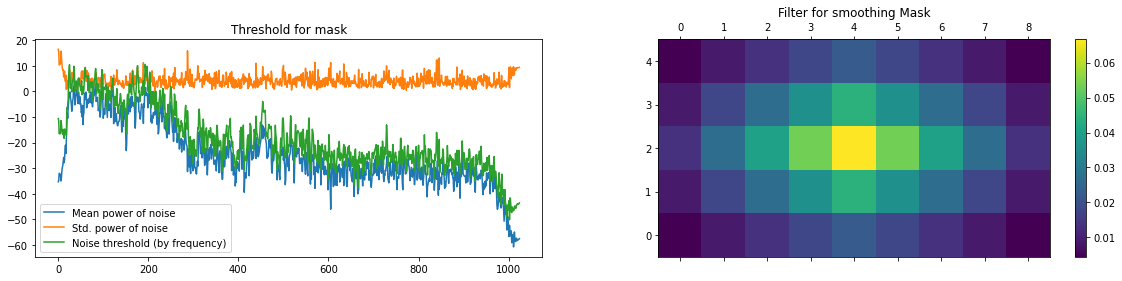

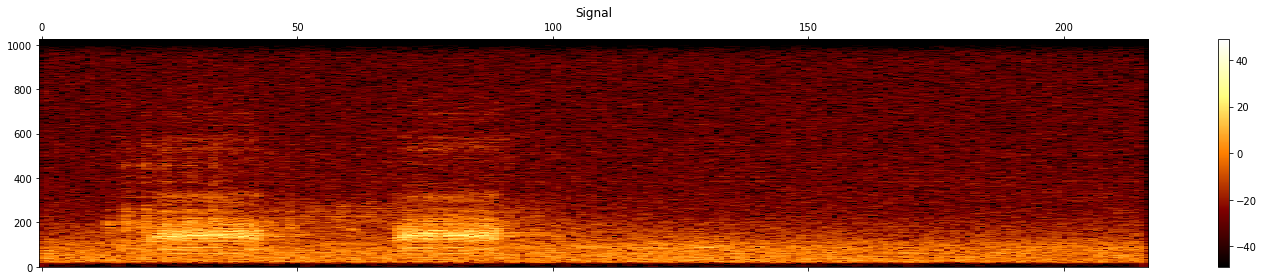

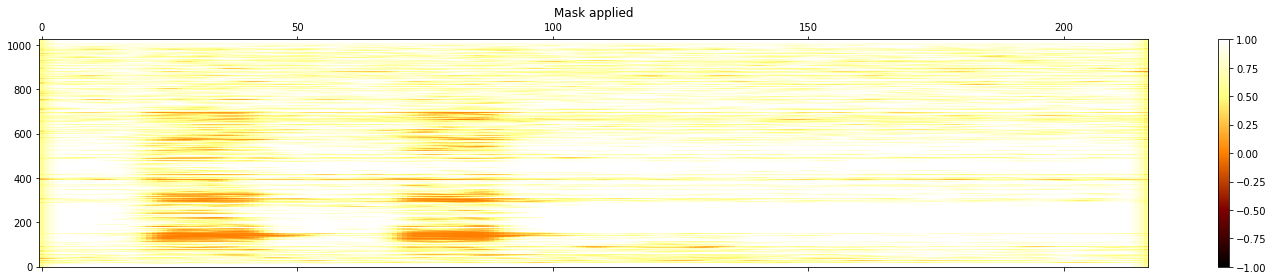

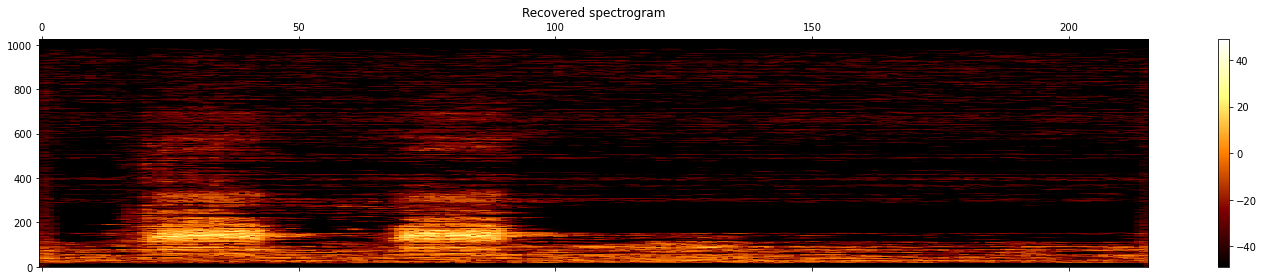

In [29]:
noisy_part = audio_data[8000:10000]  # perform noise reduction

reduced_noise = reduce_noise(audio_clip=audio_data,
                                noise_clip=noisy_part, verbose=True)

# Noise trimming
<hr style = "border:2px solid black" ></hr>


- After reducing the noisiness of the WAV file, we are left with a clean waveform of a two crow caws; however, more than 50% of the resultant waveform is empty noise. 

- In order to eliminate the chance that our ML model mistakenly learns that crow cows sound like empty noise, we can trim these portions of the waveform. 

- The `top_db` parameter allows us to specify the “threshold (in decibels) below reference to consider as silence”. By default, this reference is compared to the peak power in waveform which is calculated using numpy’s np.max . Similarly to the selecting the of the waveform, this reference value must be carefully considered for each WAV file. The peak power of crow cow may vary from WAV to WAV (perhaps the bird is farther from the audio recording ) while the dB of the wind remains constant.



In [28]:
reduced_noise

array([-0.00211626, -0.00268383, -0.00324061, ...,  0.00157944,
        0.00134421,  0.00141557])

In [30]:
trimmed, index = librosa.effects.trim(
    reduced_noise, top_db=20, frame_length=512, hop_length=64)

# References
<hr style = "border:2px solid black" ></hr>


- [Environmental Sound Classification 50](https://www.kaggle.com/mmoreaux/environmental-sound-classification-50?select=audio)
- [Sound Event Classification: A to Z](https://towardsdatascience.com/sound-event-classification-using-machine-learning-8768092beafc)
- [How to use `noisereduce` old API](https://stackoverflow.com/questions/69299518/python-typeerror-reduce-noise-got-an-unexpected-keyword)
- [GitHub code](https://github.com/markadivalerio/audio-classifier-project)

